# Comparison of Snow White, Sleeping Beauty, Cinderella, Mulan in Disneys movies

1. Import libraries
2. Cleaning and preparing the data
3. Character sentiment analysis for each movie
4. Wordcloud for the main character in each movie
5. Mean sentiment progression for each scene in each movie
6. 10 most common emotions in each movie
7. 10 most common emotions of the man character in each movie

1. Import libraries

In [ ]:
import re
import pandas as pd

2. Cleaning and preparing the data

In [2]:
import re
import pandas as pd

for filename in ['Mulan1998transcript.txt', 'Cinderella1950transcript.txt', 'SleepingBeauty1959transcript.txt', 'SnowWhite1937transcript.txt']:
    # Read in the text file
    with open('/Users/whatnameishoulduse/Desktop/NLPproject/' + filename, 'r') as f:
        text = f.read()

    # Split the text into scenes based on scene headers
    scenes = []
    current_scene = ''
    for line in text.split('\n'):
        if re.match('\[(.*)\]', line) or re.match('\((.*)\)', line):
            if current_scene:
                scenes.append(current_scene)
            current_scene = {'header': line, 'lines': []}
        elif current_scene:
            current_scene['lines'].append(line)
    scenes.append(current_scene)

    # Label each line with the character and scene
    lines = []
    for scene in scenes:
        scene_header = scene['header']
        scene_lines = scene['lines']
        scene_name = re.findall('\[(.*)\]', scene_header)[0] if re.match('\[(.*)\]', scene_header) else re.findall('\((.*)\)', scene_header)[0]
        for line in scene_lines:
            if line and ':' in line:
                character, dialogue = line.split(':', 1)
                lines.append({'scene': scene_name, 'character': character.strip(), 'dialogue': dialogue.strip()})

    # Create a DataFrame from the lines
    df = pd.DataFrame(lines)

    # Create a dictionary to map scene names to numbers
    scene_dict = {}
    count = 1
    for scene in df['scene'].unique():
        scene_dict[scene] = count
        count += 1

    # Map the scene names to numbers and add the new column to the DataFrame
    df['Scene Number'] = df['scene'].map(scene_dict)

    # Write the updated DataFrame to a new CSV file
    df.to_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + filename[:-4] + '_labeled_scene_numbered.csv', index=False)

    # count the number of lines for each character in ascending order and write it into new csv files
    df.groupby(['character', 'scene']).size().sort_values(ascending=False).to_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + filename[:-4] + '_labeled_scene_numbered_value_count.csv', index=True)






3. Character sentiment analysis for each movie

In [16]:
#chracter sentiment analysis based on the gender bias word list

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.lang.en import sentiment as s
from spacy.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer



# import spacy
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load spaCy model
# nlp = spacy.load("en_core_web_sm")

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     # Preprocess data
#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     from nltk.sentiment import SentimentIntensityAnalyzer
#     sia = SentimentIntensityAnalyzer()

#     sentiment_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         sentiment = sia.polarity_scores(script_filtered)
#         sentiment_data.append({'Character': movie, 'Sentiment': sentiment['compound'], 'Movie': file_name})

#     sentiment_df = pd.DataFrame(sentiment_data)

#     # Plot data
#     title = file_name[:-4] + ' - Character Sentiment Analysis'
#     plt.figure(figsize=(10, 7))
#     sns.set_style('whitegrid')
#     sns.barplot(x='Sentiment', y='Character', data=sentiment_df, color='red')
#     plt.xlim([-1, 1])
#     plt.xlabel('Sentiment', fontsize=15)
#     plt.ylabel('Character', fontsize=15)
#     plt.title(title, fontsize=20)
#     plt.tight_layout()
#     plt.show()


In [4]:
# sentiment analysis for each character in each movie using Female-Bias-wordparts.csv and Male-Bias-wordparts.csv in the folder gender_bias_words


# Standard imports and imports for creating a .csv
import numpy as np
import os
import csv
import urllib
import json 
import zipfile
import pandas as pd

# Import libraries for parsing
import PyPDF2 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import fnmatch

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load data
file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# Load Female-Bias-wordparts.csv and Male-Bias-wordparts.csv in the folder gender_bias_words dataset
gender_bias_words = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/Gender-Bias-wordparts.csv')


# Map emotions to integers
gender_bias_words['sentiment'] = gender_bias_words['sentiment'].map({'Male-bias words':-1, 'Female Bias words':1}) 

# Split data into training and testing sets
train_data = gender_bias_words.sample(frac=0.8, random_state=1)
test_data = gender_bias_words.drop(train_data.index)





4. Wordcloud for the main character in each movie

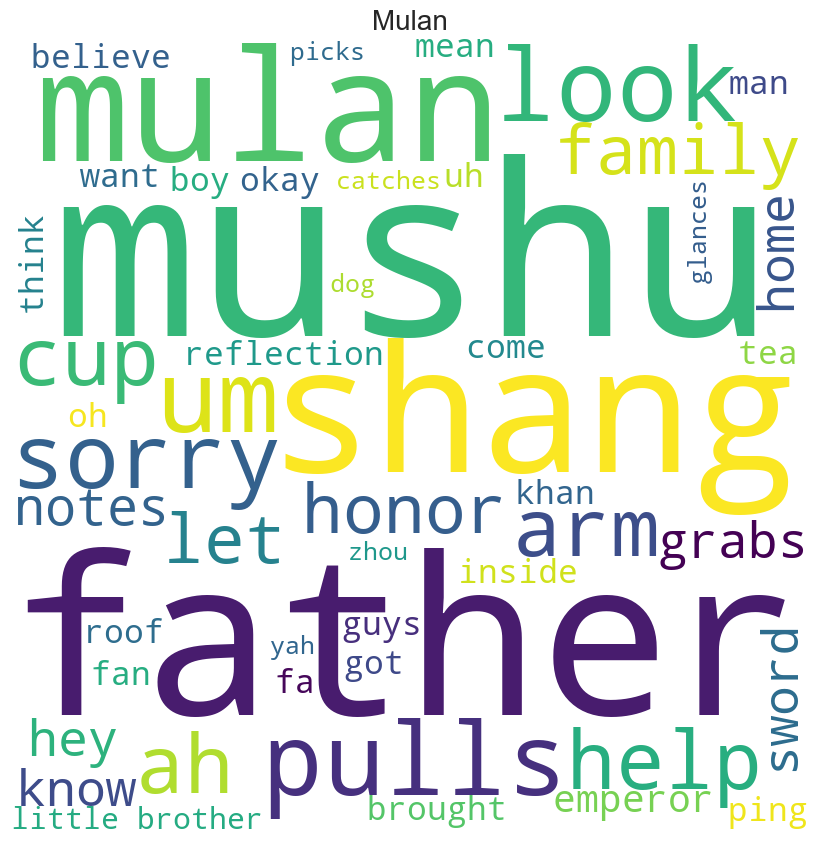

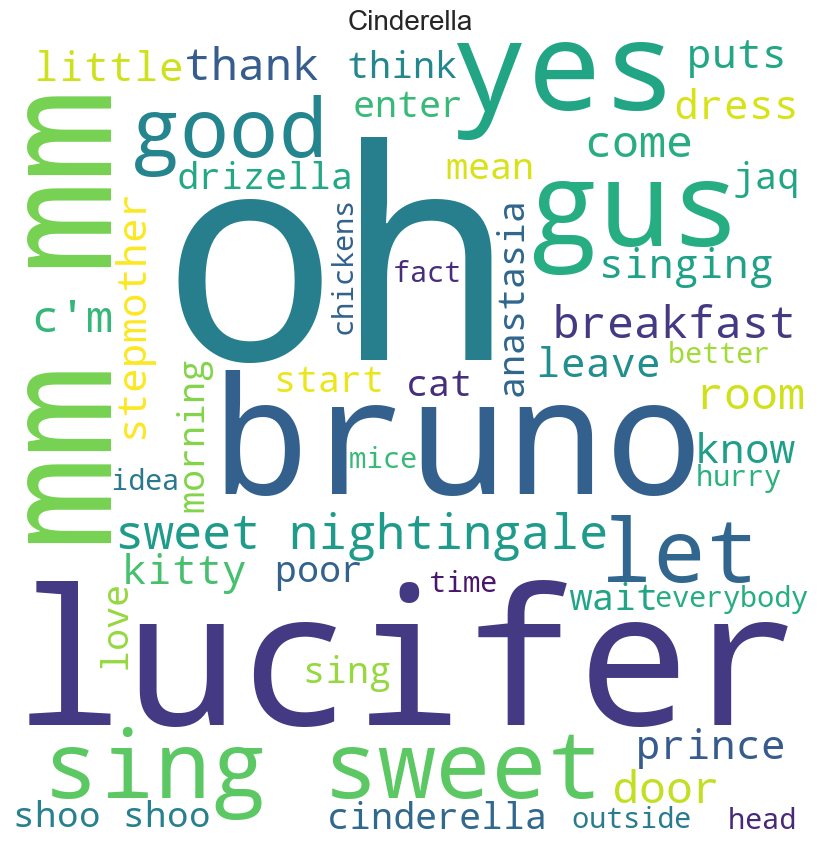

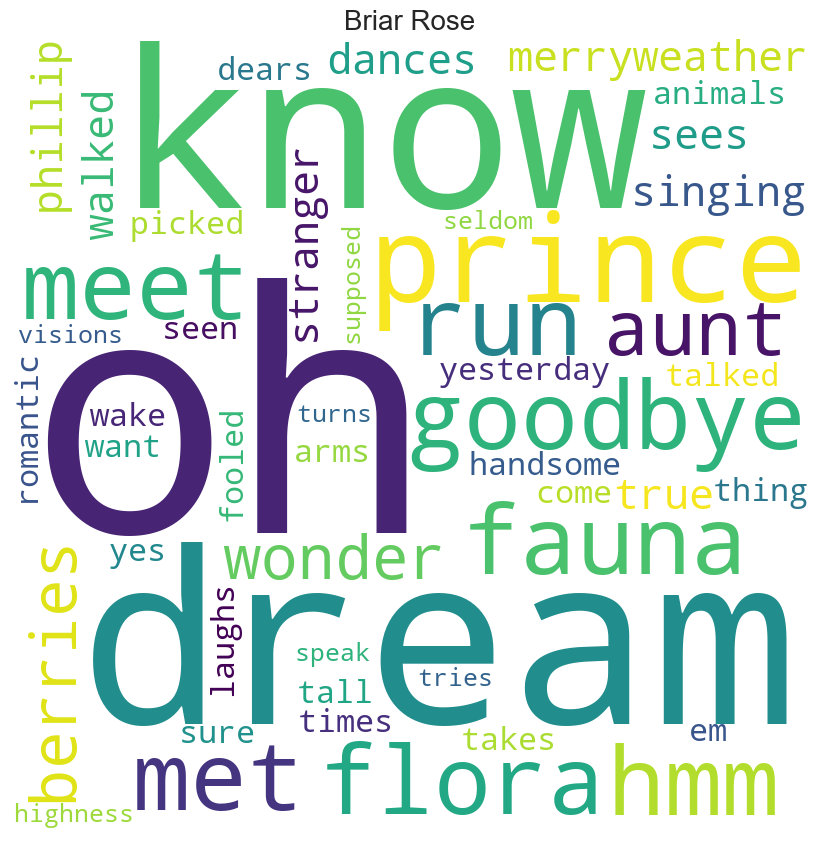

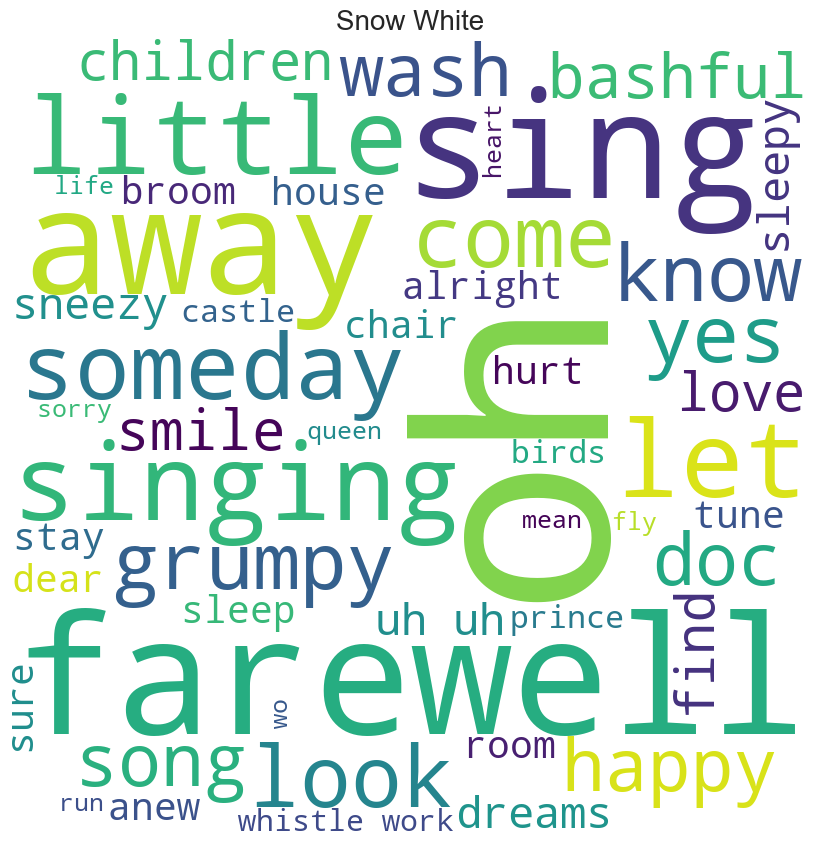

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

# Load spaCy stop words
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

# Load data
file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

for file_name in file_names:
    df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

    # Preprocess data
    movies_data = {}
    for index, row in df.iterrows():
        character = row['character']
        dialogue = row['dialogue']
        if character not in movies_data:
            movies_data[character] = {'Script': dialogue}
        else:
            movies_data[character]['Script'] += ' ' + dialogue

    for movie in movies_data:
        script = movies_data[movie]['Script'].lower()
        script_tokens = nlp(script)
        script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
        movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

    # Create word clouds
    if file_name == 'Mulan1998transcript_labeled_scene_numbered.csv':
        character = 'Mulan'
        script_filtered = movies_data[character]['Script_filtered']
        wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.title(character, fontsize=20)
        plt.show()

    elif file_name == 'Cinderella1950transcript_labeled_scene_numbered.csv':
        character = 'Cinderella'
        script_filtered = movies_data[character]['Script_filtered']
        wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.title(character, fontsize=20)
        plt.show()

    elif file_name == 'SleepingBeauty1959transcript_labeled_scene_numbered.csv':
        character = 'Briar Rose'
        script_filtered = movies_data[character]['Script_filtered']
        wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.title(character, fontsize=20)
        plt.show()

    elif file_name == 'SnowWhite1937transcript_labeled_scene_numbered.csv':
        character = 'Snow White'
        script_filtered = movies_data[character]['Script_filtered']
        wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.title(character, fontsize=20)
        plt.show()


5. Mean sentiment progression for each scene in each movie

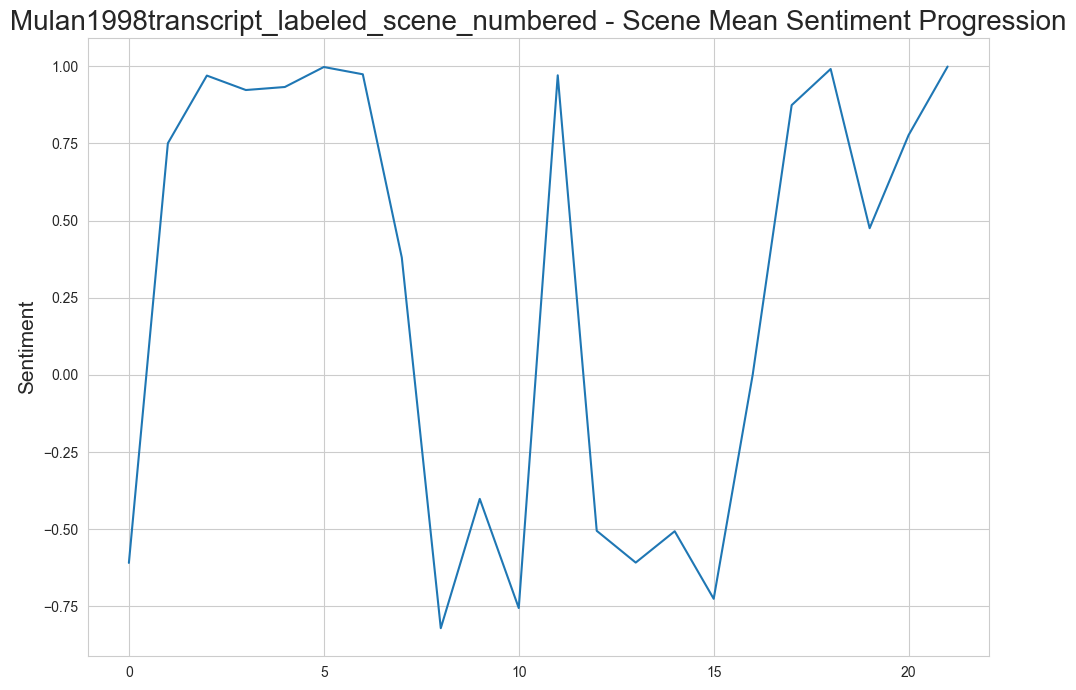

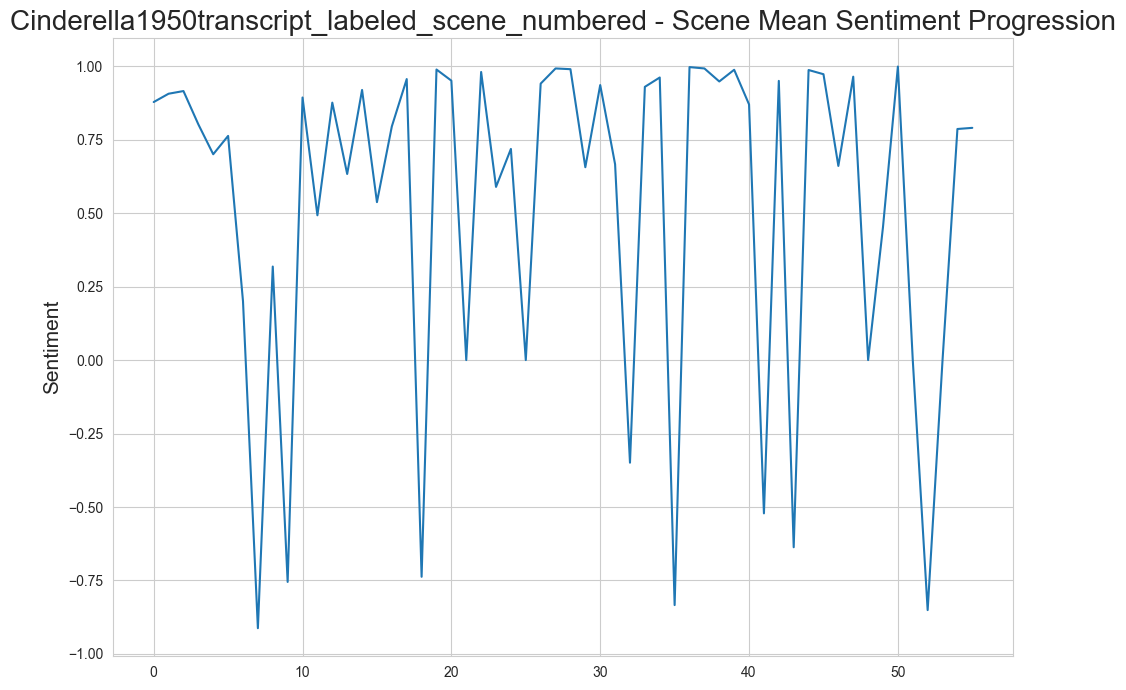

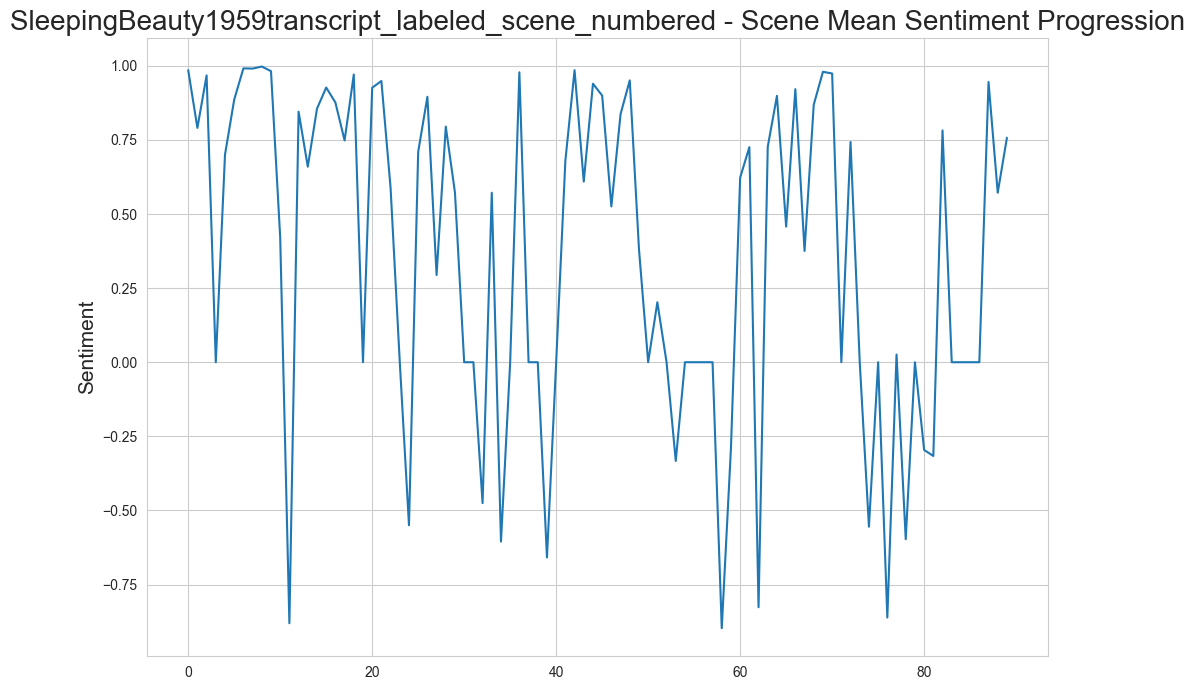

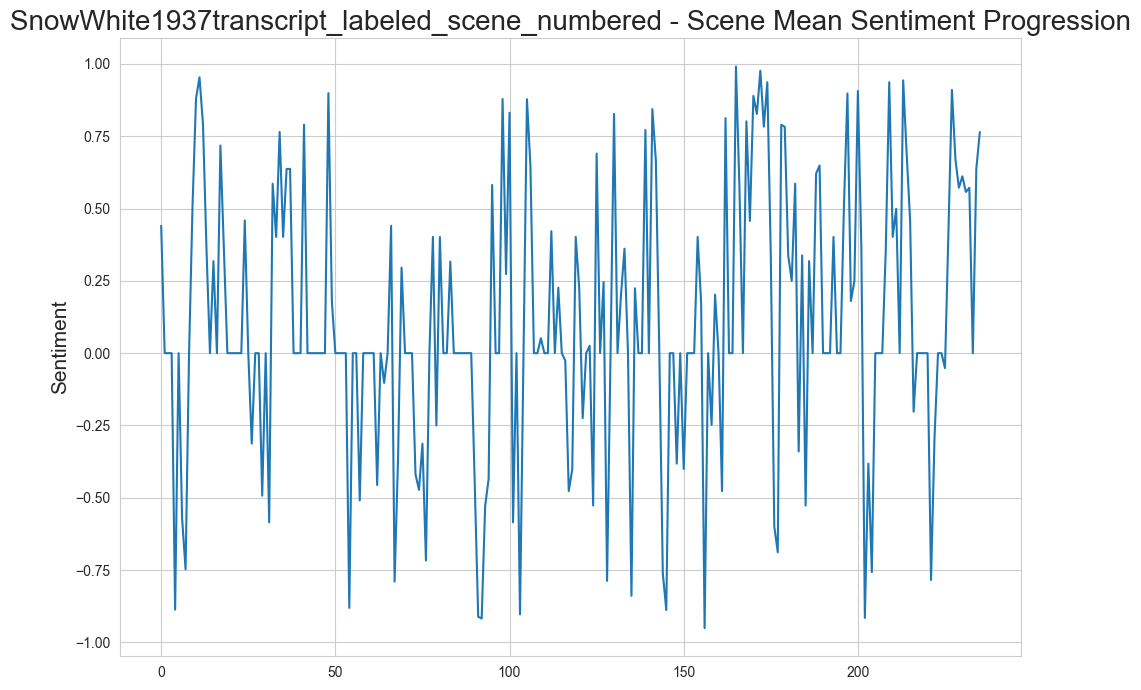

In [5]:
import re
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load data
file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

for file_name in file_names:
    df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

    # Preprocess data
    scene_data = {}
    for index, row in df.iterrows():
        scene = row['scene']
        dialogue = row['dialogue']
        if scene not in scene_data:
            scene_data[scene] = {'Script': dialogue}
        else:
            scene_data[scene]['Script'] += ' ' + dialogue

    for scene in scene_data:
        script = scene_data[scene]['Script'].lower()
        script_doc = nlp(script)
        script_filtered = [token.text for token in script_doc if not token.is_stop]
        scene_data[scene]['Script_filtered'] = ' '.join(script_filtered)

    # Calculate mean sentiment of each scene
    sentiment_data = []
    for scene in scene_data:
        script_filtered = scene_data[scene]['Script_filtered']
        sentiment = sia.polarity_scores(script_filtered)
        sentiment_data.append({'Scene': scene, 'Sentiment': sentiment['compound'], 'Movie': file_name})

    sentiment_df = pd.DataFrame(sentiment_data)
    sentiment_df = sentiment_df.sort_values(by='Scene')

    # Plot data
    title = file_name[:-4] + ' - Scene Mean Sentiment Progression'
    plt.figure(figsize=(10, 7))
    sns.set_style('whitegrid')
    sns.lineplot(x=sentiment_df.index, y='Sentiment', data=sentiment_df)
    plt.ylabel('Sentiment', fontsize=15)
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.show()


6. 10 most common emotions in each movie

In [9]:
emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
emotions = emotions.drop(columns = ['tweet_id', 'author'])
emotions.groupby('sentiment').count()





,content
sentiment,
anger,110
boredom,179
empty,827
enthusiasm,759
fun,1776
happiness,5209
hate,1323
love,3842
neutral,8638


In [1]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load emotions dataset
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])

# # Map emotions to integers
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Split data into training and testing sets
# train_data = emotions.sample(frac=0.8, random_state=1)
# test_data = emotions.drop(train_data.index)

# # Convert text data to feature vectors using TF-IDF
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(train_data['content'])
# test_features = vectorizer.transform(test_data['content'])

# # Train logistic regression model
# model = LogisticRegression()
# model.fit(train_features, train_data['sentiment'])

# # Use trained model to classify emotions in new dataset
# new_data = pd.read_csv('/path/to/new/dataset.csv')
# new_features = vectorizer.transform(new_data['content'])
# new_predictions = model.predict(new_features)
# new_data['sentiment'] = new_predictions


In [10]:
# # due to the very small number of anger and boredom tweets in comparison to the other emotions, I will remove these tweets

# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]


# # converting each emotion to an integer

# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})
# emotions.head()

# from nltk.stem import WordNetLemmatizer,PorterStemmer

# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

# def preprocess(sentence):
#     sentence=str(sentence)
#     sentence = sentence.lower()
#     sentence = sentence.replace('{html}',"") 
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, '', sentence)
#     rem_url = re.sub(r'http\S+', '',cleantext)
#     rem_num = re.sub('[0-9]+', '', rem_url)
#     tokenizer = RegexpTokenizer(r'\w+')
#     tokens = tokenizer.tokenize(rem_num)  
#     filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
#     stem_words = [PorterStemmer().stem(w) for w in filtered_words]
#     lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
#     return " ".join(filtered_words)


In [14]:
# from nltk.tokenize import RegexpTokenizer
# emotions['cleanText']=emotions['content'].map(lambda x:preprocess(x))

In [3]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load spaCy model and NLTK sentiment analyzer
# nlp = spacy.load("en_core_web_sm")
# sia = SentimentIntensityAnalyzer()

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions dataset and preprocess
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Train logistic regression model on emotions dataset
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(emotions['content'])
# model = LogisticRegression()
# model.fit(train_features, emotions['sentiment'])

# # Loop over each file and preprocess text data
# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     prediction_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

#     prediction_df = pd.DataFrame(prediction_data)


In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load spaCy model and NLTK sentiment analyzer
# nlp = spacy.load("en_core_web_sm")
# sia = SentimentIntensityAnalyzer()

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions dataset and preprocess
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Train logistic regression model on emotions dataset
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(emotions['content'])
# model = LogisticRegression()
# model.fit(train_features, emotions['sentiment'])

# # Loop over each file and preprocess text data
# prediction_data = []
# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

# prediction_df = pd.DataFrame(prediction_data)

# # Create bar plot
# sns.set(style="whitegrid")
# ax = sns.barplot(x="Character", y="Sentiment", hue="Movie", data=prediction_df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# plt.show()


In [28]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load spaCy model and NLTK sentiment analyzer
# nlp = spacy.load("en_core_web_sm")
# sia = SentimentIntensityAnalyzer()

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions dataset and preprocess
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Train logistic regression model on emotions dataset
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(emotions['content'])
# model = LogisticRegression()
# model.fit(train_features, emotions['sentiment'])

# # Loop over each movie and preprocess text data
# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     prediction_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

#     prediction_df = pd.DataFrame(prediction_data)

#     # Create bar plot for this movie
#     sns.set(style="whitegrid")
#     ax = sns.barplot(x="Character", y="Sentiment", data=prediction_df)
#     ax.set_title(file_name.replace(".csv", ""))
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
#     plt.show()


In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load spaCy model and NLTK sentiment analyzer
# nlp = spacy.load("en_core_web_sm")
# sia = SentimentIntensityAnalyzer()

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions dataset and preprocess
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Train logistic regression model on emotions dataset
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(emotions['content'])
# model = LogisticRegression()
# model.fit(train_features, emotions['sentiment'])

# # Loop over each movie and preprocess text data
# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     prediction_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

#     prediction_df = pd.DataFrame(prediction_data)

#     # Count frequency of each emotion and plot top 10
#     top_10 = prediction_df['Sentiment'].value_counts().nlargest(10)
#     sns.set(style="whitegrid")
#     ax = sns.barplot(x=top_10.index, y=top_10.values)
#     ax.set_title(file_name.replace(".csv", ""))
#     ax.set_xlabel("Sentiment")
#     ax.set_ylabel("Frequency")


In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load spaCy model and NLTK sentiment analyzer
# nlp = spacy.load("en_core_web_sm")
# sia = SentimentIntensityAnalyzer()

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions dataset and preprocess
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Train logistic regression model on emotions dataset
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(emotions['content'])
# model = LogisticRegression()
# model.fit(train_features, emotions['sentiment'])

# # Loop over each movie and preprocess text data
# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     prediction_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

#     prediction_df = pd.DataFrame(prediction_data)

#     # Count frequency of each emotion and plot top 10
#     top_10 = prediction_df['Sentiment'].value_counts().nlargest(10)
#     sns.set(style="whitegrid")
#     ax = sns.barplot(x=top_10.values, y=top_10.index, palette="Oranges_d", orient='h')
#     ax.set_title(file_name.replace(".csv", ""))
#     ax.set_xlabel("Count")
#     ax.set_ylabel("Emotion")
#     plt.show()


In [16]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load spaCy model and NLTK sentiment analyzer
# nlp = spacy.load("en_core_web_sm")
# sia = SentimentIntensityAnalyzer()

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions dataset and preprocess
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Train logistic regression model on emotions dataset
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(emotions['content'])
# model = LogisticRegression()
# model.fit(train_features, emotions['sentiment'])

# # Loop over each movie and preprocess text data
# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     prediction_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

#     prediction_df = pd.DataFrame(prediction_data)

#     # Count frequency of each emotion and plot top 10
#     top_10 = prediction_df['Sentiment'].value_counts().nlargest(10)
#     sns.set(style="whitegrid")
#     ax = sns.barplot(x=top_10.values, y=top_10.index.map({0: 'empty', 1: 'enthusiasm', 2: 'fun', 3: 'happiness', 4: 'hate', 5: 'love', 6: 'neutral', 7: 'relief', 8: 'sadness', 9: 'surprise', 10: 'worry'}), palette="Oranges_d", orient='h')
#     ax.set_title(file_name.replace(".csv", ""))
#     ax.set_xlabel("Count")
#     ax.set_ylabel("Emotion")
#     plt.show()




In [27]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # Load spaCy model and NLTK sentiment analyzer
# nlp = spacy.load("en_core_web_sm")
# sia = SentimentIntensityAnalyzer()

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions dataset and preprocess
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Train logistic regression model on emotions dataset
# vectorizer = TfidfVectorizer()
# train_features = vectorizer.fit_transform(emotions['content'])
# model = LogisticRegression()
# model.fit(train_features, emotions['sentiment'])

# # Loop over each movie and preprocess text data
# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     prediction_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

#     prediction_df = pd.DataFrame(prediction_data)

#     # Count frequency of each emotion and plot
#     emotion_counts = prediction_df['Sentiment'].value_counts()
#     sns.set(style="whitegrid")
#     ax = sns.barplot(x=emotion_counts.index.map({0: 'empty', 1: 'enthusiasm', 2: 'fun', 3: 'happiness', 4: 'hate', 5: 'love', 6: 'neutral', 7: 'relief', 8: 'sadness', 9: 'surprise', 10: 'worry'}), y=emotion_counts.values, palette="Oranges_d", orient='v')
#     ax.set_title(file_name.replace(".csv", ""))
#     ax.set_xlabel("Count")
#     ax.set_ylabel("Emotion")
#     plt.show()

7. 10 most common emotions of the man character in each movie

In [ ]:
# Use emotion counts to predict sentiment of each character in each movie

# import re
# import pandas as pd
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import spacy

# # Load spaCy stop words
# nlp = spacy.load('en_core_web_sm')
# stop_words = nlp.Defaults.stop_words

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     # Preprocess data
#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Create word clouds
#     if file_name == 'Mulan1998transcript_labeled_scene_numbered.csv':
#         character = 'Mulan'
#         script_filtered = movies_data[character]['Script_filtered']
#         wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
#         plt.figure(figsize=(8, 8), facecolor=None)
#         plt.imshow(wordcloud)
#         plt.axis('off')
#         plt.tight_layout(pad=0)
#         plt.title(character, fontsize=20)
#         plt.show()

#     elif file_name == 'Cinderella1950transcript_labeled_scene_numbered.csv':
#         character = 'Cinderella'
#         script_filtered = movies_data[character]['Script_filtered']
#         wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
#         plt.figure(figsize=(8, 8), facecolor=None)
#         plt.imshow(wordcloud)
#         plt.axis('off')
#         plt.tight_layout(pad=0)
#         plt.title(character, fontsize=20)
#         plt.show()

#     elif file_name == 'SleepingBeauty1959transcript_labeled_scene_numbered.csv':
#         character = 'Briar Rose'
#         script_filtered = movies_data[character]['Script_filtered']
#         wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
#         plt.figure(figsize=(8, 8), facecolor=None)
#         plt.imshow(wordcloud)
#         plt.axis('off')
#         plt.tight_layout(pad=0)
#         plt.title(character, fontsize=20)
#         plt.show()

#     elif file_name == 'SnowWhite1937transcript_labeled_scene_numbered.csv':
#         character = 'Snow White'
#         script_filtered = movies_data[character]['Script_filtered']
#         wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(script_filtered)
#         plt.figure(figsize=(8, 8), facecolor=None)
#         plt.imshow(wordcloud)
#         plt.axis('off')
#         plt.tight_layout(pad=0)
#         plt.title(character, fontsize=20)
#         plt.show()

# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_doc = nlp(script)
#         script_filtered = [token.text for token in script_doc if not token.is_stop]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Use trained model to predict emotions in preprocessed text data
#     prediction_data = []
#     for movie in movies_data:
#         script_filtered = movies_data[movie]['Script_filtered']
#         features = vectorizer.transform([script_filtered])
#         prediction = model.predict(features)
#         prediction_data.append({'Character': movie, 'Sentiment': prediction[0], 'Movie': file_name})

#     prediction_df = pd.DataFrame(prediction_data)

#     # Count frequency of each emotion and plot top 10
#     top_10 = prediction_df['Sentiment'].value_counts().nlargest(10)
#     sns.set(style="whitegrid")
#     ax = sns.barplot(x=top_10.values, y=top_10.index.map({0: 'empty', 1: 'enthusiasm', 2: 'fun', 3: 'happiness', 4: 'hate', 5: 'love', 6: 'neutral', 7: 'relief', 8: 'sadness', 9: 'surprise', 10: 'worry'}), palette="Oranges_d", orient='h')
#     ax.set_title(file_name.replace(".csv", ""))
#     ax.set_xlabel("Count")
#     ax.set_ylabel("Emotion")
#     plt.show()



In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Load spaCy model and stop words
# nlp = spacy.load("en_core_web_sm")
# stop_words = nlp.Defaults.stop_words

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Define emotion labels
# emotion_labels = {0: 'empty', 1: 'enthusiasm', 2: 'fun', 3: 'happiness', 4: 'hate', 5: 'love', 6: 'neutral', 7: 'relief', 8: 'sadness', 9: 'surprise', 10: 'worry'}

# # Loop over movies
# for file_name in file_names:
#     # Read data
#     df = pd.read_csv(file_name)
    
#     # Preprocess data and calculate sentiment scores
#     sentiment_data = []
#     for character, dialogue in df.groupby('character')['dialogue'].apply(lambda x: ' '.join(x)):
#         # Clean text data
#         script = dialogue.lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         script_filtered = ' '.join(script_filtered)
        
#         # Calculate sentiment scores
#         sia = SentimentIntensityAnalyzer()
#         sentiment = sia.polarity_scores(script_filtered)
        
#         # Append to data list
#         sentiment_data.append({'Character': character, 'Sentiment': sentiment['compound'], 'Movie': file_name})
    
#     # Convert sentiment data to DataFrame
#     sentiment_df = pd.DataFrame(sentiment_data)
    
#     # Map sentiment scores to emotion labels
#     sentiment_df['emotion'] = pd.cut(sentiment_df['Sentiment'], bins=[-1, -0.5, 0.5, 1], labels=[0, 1, 2])
#     sentiment_df['emotion'] = sentiment_df['emotion'].astype(int)
#     sentiment_df['emotion_label'] = sentiment_df['emotion'].map(emotion_labels)
    
#     # Plot bar chart of emotions for each character in each movie
#     plt.figure(figsize=(10,7))
#     sns.countplot(y='Character', hue='emotion_label', data=sentiment_df, palette='husl', order=sentiment_df['Character'].value_counts().index)
#     plt.title(f'{file_name[:-4]}: Emotion Counts by Character', fontsize=20)
#     plt.xlabel('Count', fontsize=15)
#     plt.ylabel('Character', fontsize=15)
#     plt.legend(title='Emotion')
#     plt.show()


In [20]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Load spaCy model and stop words
# nlp = spacy.load("en_core_web_sm")
# stop_words = nlp.Defaults.stop_words

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions data
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})

# # Define emotion labels
# emotion_labels = {0: 'empty', 1: 'enthusiasm', 2: 'fun', 3: 'happiness', 4: 'hate', 5: 'love', 6: 'neutral', 7: 'relief', 8: 'sadness', 9: 'surprise', 10: 'worry'}

# # Loop over movies
# for file_name in file_names:
#     # Read data
#     df = pd.read_csv(file_name)
    
#     # Preprocess data and calculate sentiment scores
#     sentiment_data = []
#     for character, dialogue in df.groupby('character')['dialogue'].apply(lambda x: ' '.join(x)):
#         # Clean text data
#         script = dialogue.lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         script_filtered = ' '.join(script_filtered)
        
#         # Calculate sentiment scores
#         sia = SentimentIntensityAnalyzer()
#         sentiment = sia.polarity_scores(script_filtered)
        
#         # Append to data list
#         sentiment_data.append({'Character': character, 'Sentiment': sentiment['compound'], 'Movie': file_name})
    
#     # Convert sentiment data to DataFrame
#     sentiment_df = pd.DataFrame(sentiment_data)
    
#     # Map sentiment scores to emotion labels
#     sentiment_df['emotion'] = pd.cut(sentiment_df['Sentiment'], bins=[-1, -0.5, 0.5, 1], labels=[0, 1, 2])
#     sentiment_df['emotion'] = sentiment_df['emotion'].astype(int)
#     sentiment_df['emotion_label'] = sentiment_df['emotion'].map(emotion_labels)
    
#     # Plot bar chart of emotions for each character in each movie
#     plt.figure(figsize=(10,7))
#     sns.countplot(y='Character', hue='emotion_label', data=sentiment_df, palette='husl', order=sentiment_df['Character'].value_counts().index)
#     plt.title(f'{file_name[:-4]}: Emotion Counts by Character', fontsize=20)
#     plt.xlabel('Count', fontsize= 15)
#     plt.ylabel('Character', fontsize=15)
#     plt.legend(title='Emotion')
#     plt.show()



In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import spacy
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Load spaCy model and stop words
# nlp = spacy.load("en_core_web_sm")
# stop_words = nlp.Defaults.stop_words

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Define emotion labels
# emotion_labels = {0: 'empty', 1: 'enthusiasm', 2: 'fun', 3: 'happiness', 4: 'hate', 5: 'love', 6: 'neutral', 7: 'relief', 8: 'sadness', 9: 'surprise', 10: 'worry'}

# # Loop over movies
# for file_name in file_names:
#     # Read data
#     df = pd.read_csv(file_name)
    
#     # Preprocess data and calculate sentiment scores
#     sentiment_data = []
#     for index, row in df.iterrows():
#         # Get character and dialogue
#         character = row['character']
#         dialogue = row['dialogue']
        
#         # Clean text data
#         script = dialogue.lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         script_filtered = ' '.join(script_filtered)
        
#         # Calculate sentiment scores
#         sia = SentimentIntensityAnalyzer()
#         sentiment = sia.polarity_scores(script_filtered)
        
#         # Append to data list
#         sentiment_data.append({'Character': character, 'Sentiment': sentiment['compound'], 'Movie': file_name})
    
#     # Convert sentiment data to DataFrame
#     sentiment_df = pd.DataFrame(sentiment_data)
    
#     # Map sentiment scores to emotion labels
#     sentiment_df['emotion'] = pd.cut(sentiment_df['Sentiment'], bins=[-1, -0.5, 0.5, 1], labels=[0, 1, 2])
#     sentiment_df['emotion'] = sentiment_df['emotion'].astype(int)
#     sentiment_df['emotion_label'] = sentiment_df['emotion'].map(emotion_labels)
    
#     # Plot bar chart of emotions for each character in each movie
#     plt.figure(figsize=(10,7))
#     sns.countplot(y='Character', hue='emotion_label', data=sentiment_df, palette='husl', order=sentiment_df['Character'].value_counts().index)
#     plt.title(f'{file_name[:-4]}: Emotion Counts by Character', fontsize=20)
#     plt.xlabel('Count', fontsize=15)
#     plt.ylabel('Character', fontsize=15)
#     plt.legend(title='Emotion')
#     plt.show()


In [23]:
# import pandas as pd
# import seaborn as sns
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions data
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# # emotions = emotions.reset_index(drop=True)
# # emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10}) 

# # Loop over movies
# for file_name in file_names:
#     # Read data
#     df = pd.read_csv(file_name)
    
#     # Preprocess data and calculate sentiment scores
#     sentiment_data = []
#     for character, dialogue in df.groupby('character')['dialogue'].apply(lambda x: ' '.join(x)):
#         # Clean text data
#         script = dialogue.lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         script_filtered = ' '.join(script_filtered)
        
#         # Calculate sentiment scores
#         sia = SentimentIntensityAnalyzer()
#         sentiment = sia.polarity_scores(script_filtered)
        
#         # Append to data list
#         sentiment_data.append({'Character': character, 'Sentiment': sentiment['compound'], 'Movie': file_name})
    
#     # Convert sentiment data to DataFrame
#     sentiment_df = pd.DataFrame(sentiment_data)
    
#     # Map sentiment scores to emotion labels
#     sentiment_df['emotion'] = pd.cut(sentiment_df['Sentiment'], bins=[-1, -0.5, 0.5, 1], labels=[0, 1, 2])
#     sentiment_df['emotion'] = sentiment_df['emotion'].astype(int)
#     sentiment_df['emotion_label'] = sentiment_df['emotion'].map(emotion_labels)
    
#     # Count most common emotions for each character
#     for character in sentiment_df['Character'].unique():
#         character_df = sentiment_df[sentiment_df['Character'] == character]
#         counts = character_df['emotion_label'].value_counts()
#         print(f'{character} in {file_name}:')
#         for label, count in counts.items():
#             print(f'{label}: {count}')
#         print()



# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     # Preprocess data
#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Count emotions for each character
#     if file_name == 'Mulan1998transcript_labeled_scene_numbered.csv':
#         character = 'Mulan'
#         script_filtered = movies_data[character]['Script_filtered']



#     elif file_name == 'Cinderella1950transcript_labeled_scene_numbered.csv':
#         character = 'Cinderella'
#         script_filtered = movies_data[character]['Script_filtered']
  

#     elif file_name == 'SleepingBeauty1959transcript_labeled_scene_numbered.csv':
#         character = 'Briar Rose'
#         script_filtered = movies_data[character]['Script_filtered']


#     elif file_name == 'SnowWhite1937transcript_labeled_scene_numbered.csv':
#         character = 'Snow White'
#         script_filtered = movies_data[character]['Script_filtered']



In [25]:
# import pandas as pd
# import seaborn as sns
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions data
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
# emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10}) 

# # Loop over movies
# for file_name in file_names:
#     # Read data
#     df = pd.read_csv(file_name)
    
#     # Preprocess data and calculate sentiment scores
#     sentiment_data = []
#     for character, dialogue in df.groupby('character')['dialogue'].apply(lambda x: ' '.join(x)):
#         # Clean text data
#         script = dialogue.lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         script_filtered = ' '.join(script_filtered)
        
#         # Calculate sentiment scores
#         sia = SentimentIntensityAnalyzer()
#         sentiment = sia.polarity_scores(script_filtered)
        
#         # Append to data list
#         sentiment_data.append({'Character': character, 'Sentiment': sentiment['compound'], 'Movie': file_name})
    
#     # Convert sentiment data to DataFrame
#     sentiment_df = pd.DataFrame(sentiment_data)
    
#     # Map sentiment scores to emotion labels
#     sentiment_df['emotion'] = pd.cut(sentiment_df['Sentiment'], bins=[-1, -0.5, 0.5, 1], labels=[0, 1, 2])
#     sentiment_df['emotion'] = sentiment_df['emotion'].astype(int)
#     sentiment_df['emotion_label'] = sentiment_df['emotion'].map(emotion_labels)
    
#     # Count most common emotions for each character
#     for character in sentiment_df['Character'].unique():
#         character_df = sentiment_df[sentiment_df['Character'] == character]
#         counts = character_df['emotion_label'].value_counts()
#         print(f'{character} in {file_name}:')
#         for label, count in counts.items():
#             print(f'{label}: {count}')
#         print()

#     # Preprocess data for counting emotions
#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     # Count emotions for each character
#     if file_name == 'Mulan1998transcript_labeled_scene_numbered.csv':
#         character = 'Mulan'
#         script_filtered = movies_data[character]['Script_filtered']




#     elif file_name == 'Cinderella1950transcript_labeled_scene_numbered.csv':
#         character = 'Cinderella'
#         script_filtered = movies_data[character]['Script_filtered']
  

#     elif file_name == 'SleepingBeauty1959transcript_labeled_scene_numbered.csv':
#         character = 'Briar Rose'
#         script_filtered = movies_data[character]['Script_filtered']


#     elif file_name == 'SnowWhite1937transcript_labeled_scene_numbered.csv':
#         character = 'Snow White'
#         script_filtered = movies_data[character]['Script_filtered']

#     # Calculate sentiment scores
#     sia = SentimentIntensityAnalyzer()
#     sentiment_scores = sia.polarity_scores(script_filtered)
    
#     # Map sentiment scores to emotion labels
#     sentiment_label = None
#     if sentiment_scores['compound'] >= 0.5:
#         sentiment_label = 'Positive'
#     elif sentiment_scores['compound'] <= -0.5:
#         sentiment_label = 'Negative'
#     else:
#         sentiment_label = 'Neutral'
    
#     # Print results
#     print(f'Emotion analysis for {character} in {file_name}:')
#     print(f'Total number of words: {len(script_filtered.split())}')
#     print(f'Sentiment score: {sentiment_scores["compound"]}')
#     print(f'Sentiment label: {sentiment_label}')
#     print()


In [ ]:
# #count the emotions for each character in each movie
# import pandas as pd
# import seaborn as sns
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions data
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]


# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     # Preprocess data
#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#     # Count emotions for each character





In [33]:
# import pandas as pd
# import seaborn as sns
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Load data
# file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# # Load emotions data
# emotions = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/text_emotion.csv')
# emotions = emotions.drop(columns=['tweet_id', 'author'])
# emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]


# # Initialize SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

# for file_name in file_names:
#     df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

#     # Preprocess data
#     movies_data = {}
#     for index, row in df.iterrows():
#         character = row['character']
#         dialogue = row['dialogue']
#         if character not in movies_data:
#             movies_data[character] = {'Script': dialogue}
#         else:
#             movies_data[character]['Script'] += ' ' + dialogue

#     for movie in movies_data:
#         script = movies_data[movie]['Script'].lower()
#         script_tokens = nlp(script)
#         script_filtered = [token.text for token in script_tokens if not token.is_stop and not token.is_punct and not token.like_num]
#         movies_data[movie]['Script_filtered'] = ' '.join(script_filtered)

#         # Count emotions for each character
#         emotions_count = {'empty': 0, 'enthusiasm': 0, 'fun': 0, 'happiness': 0, 'hate': 0, 'love': 0, 'neutral': 0, 'relief': 0, 'sadness': 0, 'surprise': 0, 'worry': 0, 'unknown': 0}
#         for sentence in script_filtered:
#             sentiment_scores = sia.polarity_scores(sentence)
#             dominant_emotion = max(sentiment_scores, key=sentiment_scores.get)
#             if dominant_emotion in emotions_count:
#                 emotions_count[dominant_emotion] += 1
#             else:
#                 emotions_count['unknown'] += 1
#         movies_data[movie]['Emotions_count'] = emotions_count

#     # Print results
#     for character in movies_data:
#         print(f"{file_name}: {character}: {movies_data[character]['Emotions_count']}")


In [34]:
# import pandas as pd
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from nltk.stem import WordNetLemmatizer, PorterStemmer
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # Load Sentiment140 dataset
# sentiment140 = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/training.1600000.processed.noemoticon.csv', encoding='cp1252', names=['label', 'id', 'date', 'flag', 'user', 'text'])

# # Drop unnecessary columns
# sentiment140 = sentiment140.drop(['id', 'date', 'flag', 'user'], axis=1)

# # Define preprocessing function
# def preprocess(sentence):
#     sentence = str(sentence)
#     sentence = sentence.lower()
#     sentence = sentence.replace('{html}', '')
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, '', sentence)
#     rem_url = re.sub(r'http\S+', '', cleantext)
#     rem_num = re.sub('[0-9]+', '', rem_url)
#     tokenizer = RegexpTokenizer(r'\w+')
#     tokens = tokenizer.tokenize(rem_num)
#     filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
#     stem_words = [PorterStemmer().stem(w) for w in filtered_words]
#     lemma_words = [WordNetLemmatizer().lemmatize(w) for w in stem_words]
#     return " ".join(filtered_words)

# # Preprocess text data
# sentiment140['text'] = sentiment140['text'].apply(preprocess)

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(sentiment140['text'], sentiment140['label'], test_size=0.2, random_state=42)

# # Convert text to vector using CountVectorizer and TfidfTransformer
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# # Train Logistic Regression model
# lr = LogisticRegression()
# lr.fit(X_train_tfidf, y_train)

# # Evaluate model on testing set
# X_test_counts = count_vect.transform(X_test)
# X_test_tfidf = tfidf_transformer.transform(X_test_counts)
# y_pred = lr.predict(X_test_tfidf)
# print(classification_report(y_test, y_pred))


/Users/whatnameishoulduse/opt/anaconda3/envs/env_name/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159494
           4       0.77      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



Bigrams, trigrams

In [42]:
# create bigrams and trigrams
from nltk.util import ngrams
from collections import Counter

# load data
file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

for file_name in file_names:
    df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

    # Preprocess data
    scene_data = {}
    for index, row in df.iterrows():
        scene = row['scene']
        dialogue = row['dialogue']
        if scene not in scene_data:
            scene_data[scene] = {'Script': dialogue}
        else:
            scene_data[scene]['Script'] += ' ' + dialogue

    for scene in scene_data:
        script = scene_data[scene]['Script'].lower()
        script_doc = nlp(script)
        script_filtered = [token.text for token in script_doc if not token.is_stop]
        scene_data[scene]['Script_filtered'] = ' '.join(script_filtered)

    # Calculate mean sentiment of each scene
    sentiment_data = []
    for scene in scene_data:
        script_filtered = scene_data[scene]['Script_filtered']
        sentiment = sia.polarity_scores(script_filtered)
        sentiment_data.append({'Scene': scene, 'Sentiment': sentiment['compound'], 'Movie': file_name})

    def get_top_n2_gram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

    def get_top_n3_gram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

# get top 20 bigrams
top2_gram = get_top_n2_gram(df['dialogue'], 20)
top2_gram_df = pd.DataFrame(top2_gram, columns = ['2-gram' , 'count'])
print(top2_gram_df)

# get top 20 trigrams
top3_gram = get_top_n3_gram(df['dialogue'], 20)
top3_gram_df = pd.DataFrame(top3_gram, columns = ['3-gram' , 'count'])
print(top3_gram_df)




            2-gram  count
0         heigh ho     58
1         ho heigh     43
2          dig dig     31
3            ah ch     18
4            ch ah     17
5            uh uh     10
6       snow white     10
7          ho home      8
8        home work      8
9            ch ch      7
10         don let      6
11   singing heigh      5
12  work whistling      5
13           ah ah      5
14   bluddle uddle      5
15        uddle um      5
16          um dum      5
17         don don      5
18     dreams come      5
19        don know      4
                  3-gram  count
0         heigh ho heigh     43
1            ho heigh ho     42
2            dig dig dig     25
3               ah ch ah     11
4               ch ah ch     10
5          heigh ho home      8
6           ho home work      8
7       singing heigh ho      5
8       bluddle uddle um      5
9           uddle um dum      5
10              ah ch ch      5
11              ch ch ah      5
12              uh uh uh      3
13   h

In [45]:
# Import the necessary libraries
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import joblib

# Load the pre-trained model
model = joblib.load('/Users/whatnameishoulduse/Desktop/text_emotions_detection.pkl')

# Define the file names of the movie scripts
file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# Loop through the file names
for file_name in file_names:
    # Load the CSV file into a pandas dataframe
    df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

    # Preprocessing
    sentences = df['dialogue'].values
    
    # Sentiment analysis
    sentiments = []
    for sentence in sentences:
        blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
        sentiment = model.predict([sentence])[0]
        sentiments.append(sentiment)
    
    # Add the sentiment column to the dataframe
    df['sentiment'] = sentiments
    
    # Save the dataframe to a new CSV file
    df.to_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name.split('.')[0] + '_sentiment.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/whatnameishoulduse/Desktop/text_emotions_detection.pkl'

In [48]:


# Import the necessary libraries
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import joblib

# Load the pre-trained model
model = joblib.load('/Users/whatnameishoulduse/Desktop/NLPproject/gendered-words-code/model.py')

# Define the file names of the movie scripts
file_names = ['Mulan1998transcript_labeled_scene_numbered.csv', 'Cinderella1950transcript_labeled_scene_numbered.csv', 'SleepingBeauty1959transcript_labeled_scene_numbered.csv', 'SnowWhite1937transcript_labeled_scene_numbered.csv']

# Loop through the file names
for file_name in file_names:
    # Load the CSV file into a pandas dataframe
    df = pd.read_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name)

    # Preprocessing
    sentences = df['dialogue'].values
    
    # Sentiment analysis
    sentiments = []
    for sentence in sentences:
        blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
        sentiment = model.predict([sentence])[0]
        sentiments.append(sentiment)
    
    # Add the sentiment column to the dataframe
    df['sentiment'] = sentiments
    
    # Save the dataframe to a new CSV file
    df.to_csv('/Users/whatnameishoulduse/Desktop/NLPproject/' + file_name.split('.')[0] + '_sentiment.csv', index=False)


ModuleNotFoundError: No module named 'mport os\r'